# Data Analysis - Geography

Import libraries

In [57]:
import math
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from re import sub
import matplotlib.cm as cm

%matplotlib inline

In [3]:
#Read in the data

dat = pd.read_csv("listings.csv",encoding = 'latin-1')
dat_loc = dat[['id','street','neighbourhood','neighbourhood_cleansed','city','state',
               'zipcode','latitude','longitude','price']]
dat_loc.head()

,id,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,price
0,1069266,"East 53rd Street, New York, NY 10022, United S...",Midtown East,Midtown East,New York,NY,10022-4175,40.756852,-73.964754,$160.00
1,1846722,"West 155th Street, New York, NY, United States",Hamilton Heights,Hamilton Heights,New York,NY,NaN,40.830599,-73.941014,$105.00
2,2061725,"Van Buren Street, Brooklyn, NY 11221, United S...",Bushwick,Bushwick,Brooklyn,NY,11221,40.692189,-73.924120,$58.00
3,44974,"Greenwich Ave, New York, NY 10011, United States",West Village,West Village,New York,NY,10011,40.734751,-74.002592,$185.00
4,4701675,"West 22nd Street, New York, NY 10011, United S...",Chelsea,Chelsea,New York,NY,10011,40.745282,-73.997836,$195.00


In [4]:
pd.unique(dat_loc['zipcode'])

array(['10022-4175', nan, '11221', '10011', '11231', '11207', '10013',
       '10003', '11217', '10018', '11213', '10019', '10014', '10040',
       '10033', '11238', '10038', '10027', '11222', '11206', '10025',
       '10030', '10035', '10009', '10031', '10016', '10026', '10005',
       '10012', '11102', '10128', '11101', '11385', '10028', '11211',
       '11215', '10007', '11205', '10023', '10002', '10010', '11237',
       '10024', '10039', '11233', '10022', '10037', '10455', '11220',
       '11249', '11216', '10075', '11235', '11201', '11374', '10036',
       '11234', '10001', '10032', '11103', '10463', '11106', '11230',
       '10466', '11372', '10017', '11377', '11109', '11105', '10301',
       '11210', '10065', '11226', '10021', '11373', '10004', '11432',
       '11415', '10306', '10034', '11413', '11236', '10029', '11225',
       '11365', '10305', '11355', '11375', '11204', '11369', '11208',
       '11370', '11361', '10464', '11378', '11223', '11104', '11203',
       '10451', '11

In [5]:

zips = []
for i in dat_loc['zipcode']:
    i = str(i)
    if len(i) == 10:
        zips.append(i[:5])
    elif len(i) == 5:
        zips.append(i)




In [6]:
len(zips[zips=="10022"])

5

In [106]:
zips = pd.Series(zips)
unique_zips = pd.unique(zips)

log_prices = np.log(prices)

zip_counts = []
zip_prices = []
for i in unique_zips:
    zip_counts.append(len(zips[zips==i]))
    zip_prices.append(np.mean(log_prices[zips==i]))
    

zipcodes = pd.DataFrame({"zipcode":unique_zips,
                        "count":zip_counts,
                        "price":zip_prices})

zipcodes.head()

/Users/samheller/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


,count,price,zipcode
0,224,5.071708,10022
1,619,5.065597,11221
2,855,5.061946,10011
3,234,5.071554,11231
4,181,5.072374,11207


<Container object of 179 artists>

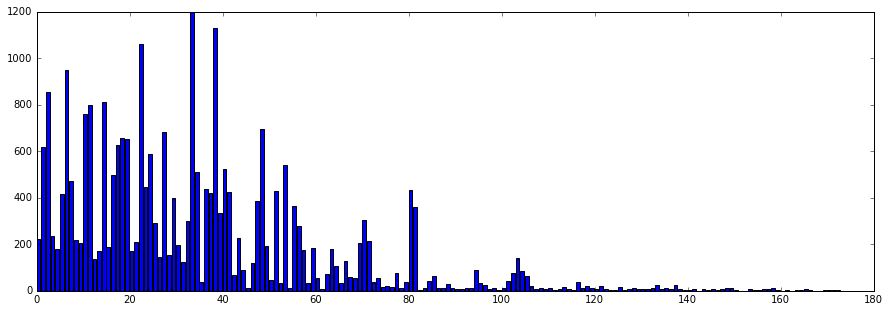

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.bar(range(len(zipcodes['zipcode'])),zipcodes['count'],tick_label=None)


(array([   2.,    1.,    2.,    3.,    6.,    5.,   11.,    6.,   23.,  120.]),
 array([ 5.05660861,  5.05846359,  5.06031856,  5.06217353,  5.06402851,
         5.06588348,  5.06773845,  5.06959343,  5.0714484 ,  5.07330337,
         5.07515834]),
 <a list of 10 Patch objects>)

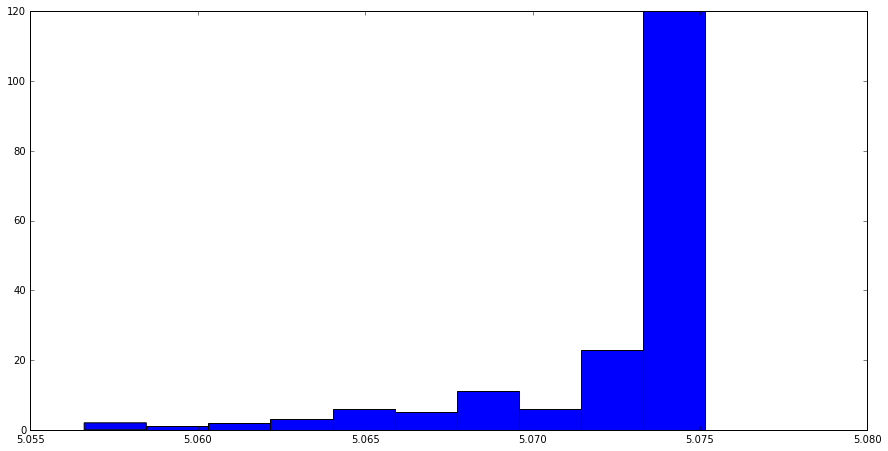

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
ax.hist(zipcodes['price'])

In [112]:
### Neighborhood Data
neighborhoods = dat_loc['neighbourhood_cleansed']
unique_neighborhoods = pd.unique(neighborhoods)


neighborhood_counts = []
neighborhood_avprice = []
for i in unique_neighborhoods:
    neighborhood_counts.append(len(neighborhoods[neighborhoods==i]))
    neighborhood_avprice.append(np.mean(log_prices[neighborhoods==i]))

    
neighborhoods_df = pd.DataFrame({"neighborhood":unique_neighborhoods,
                                 "count":neighborhood_counts,
                                "price":neighborhood_avprice})
neighborhoods_df.head()



/Users/samheller/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


,count,neighborhood,price
0,382,Midtown East,5.069300
1,481,Hamilton Heights,5.067777
2,1098,Bushwick,5.058290
3,797,West Village,5.062918
4,905,Chelsea,5.061257


<Container object of 186 artists>

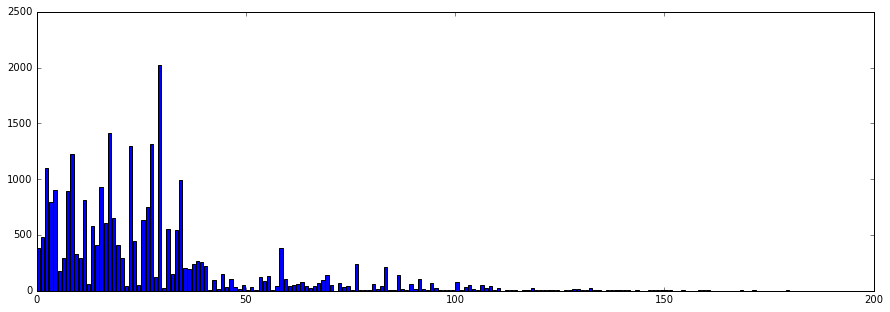

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.bar(range(len(neighborhoods_df['neighborhood'])),neighborhoods_df['count'],tick_label=None)


(array([   1.,    0.,    0.,    4.,    1.,    5.,    4.,    8.,   12.,  151.]),
 array([ 5.04409641,  5.04720261,  5.05030881,  5.05341502,  5.05652122,
         5.05962742,  5.06273362,  5.06583983,  5.06894603,  5.07205223,
         5.07515844]),
 <a list of 10 Patch objects>)

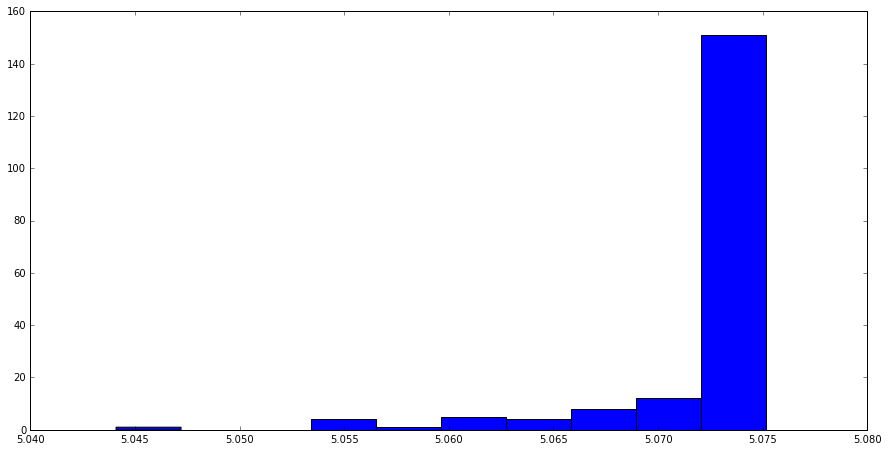

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
ax.hist(neighborhoods_df['price'])

In [9]:
dat_loc.head()

,id,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,latitude,longitude,price
0,1069266,"East 53rd Street, New York, NY 10022, United S...",Midtown East,Midtown East,New York,NY,10022-4175,40.756852,-73.964754,$160.00
1,1846722,"West 155th Street, New York, NY, United States",Hamilton Heights,Hamilton Heights,New York,NY,NaN,40.830599,-73.941014,$105.00
2,2061725,"Van Buren Street, Brooklyn, NY 11221, United S...",Bushwick,Bushwick,Brooklyn,NY,11221,40.692189,-73.924120,$58.00
3,44974,"Greenwich Ave, New York, NY 10011, United States",West Village,West Village,New York,NY,10011,40.734751,-74.002592,$185.00
4,4701675,"West 22nd Street, New York, NY 10011, United S...",Chelsea,Chelsea,New York,NY,10011,40.745282,-73.997836,$195.00


In [10]:
prices = []
for i in range(len(dat_loc['price'])):
    money = dat_loc['price'][i]
    value = (sub(r'[^\d.]', '', money))
    value = int(value[:-3])
    prices.append(value)

prices   


norm = matplotlib.colors.Normalize(vmin=min(log_prices), vmax=max(log_prices))
cmap = cm.hot

m = cm.ScalarMappable(norm=norm, cmap=cmap)


(array([  4.00000000e+00,   3.49000000e+02,   4.16800000e+03,
          1.04040000e+04,   9.73900000e+03,   2.14000000e+03,
          4.16000000e+02,   1.18000000e+02,   3.90000000e+01,
          1.50000000e+01]),
 array([ 2.30258509,  2.97104627,  3.63950744,  4.30796861,  4.97642978,
         5.64489096,  6.31335213,  6.9818133 ,  7.65027448,  8.31873565,
         8.98719682]),
 <a list of 10 Patch objects>)

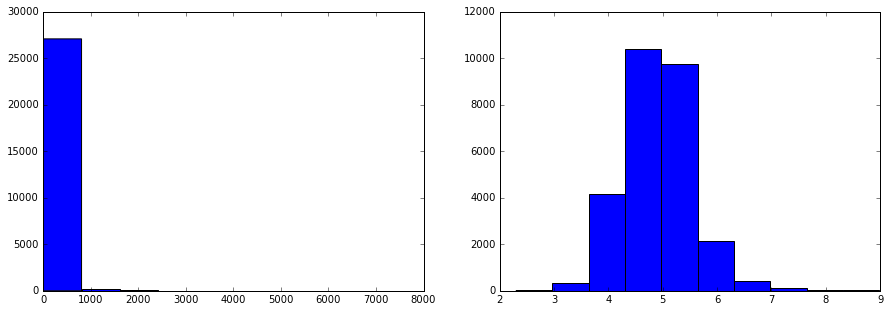

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(prices)
ax[1].hist(log_prices)

In [24]:
#price_resized = [x/max(prices) for x in prices]
log_price_resized = (log_prices-min(log_prices))/(max(log_prices)-min(log_prices))

log_price_resized

array([ 0.41477184,  0.35175944,  0.26297083, ...,  0.34295706,
        0.25502575,  0.35871871])

In [25]:
min(log_price_resized), max(log_price_resized)

(0.0, 1.0)

In [53]:
color = m.to_rgba(np.log(prices))


In [45]:
color = log_price_resized


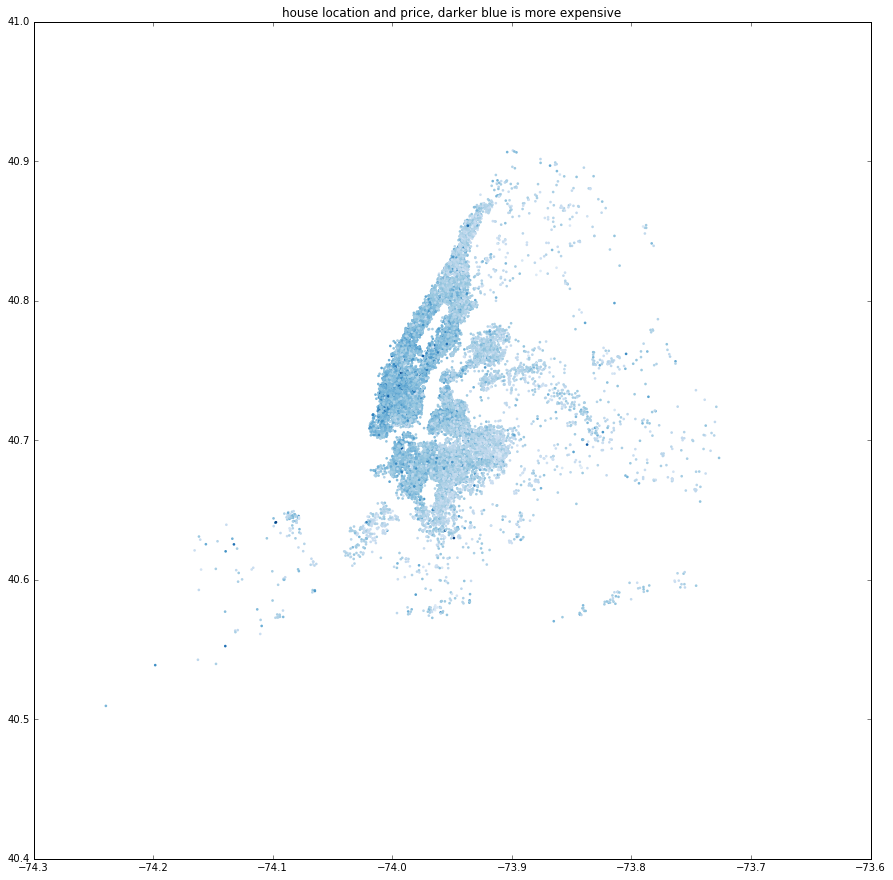

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


ax.scatter(dat_loc['longitude'],dat_loc['latitude'],c=log_prices,s=7,linewidth=0,cmap="Blues")
ax.set_title('house location and price, darker blue is more expensive' )

In [33]:
type(log_price_resized[1])

numpy.float64

In [16]:
np.log(prices)

array([ 5.07517382,  4.65396035,  4.06044301, ...,  4.59511985,
        4.00733319,  4.70048037])

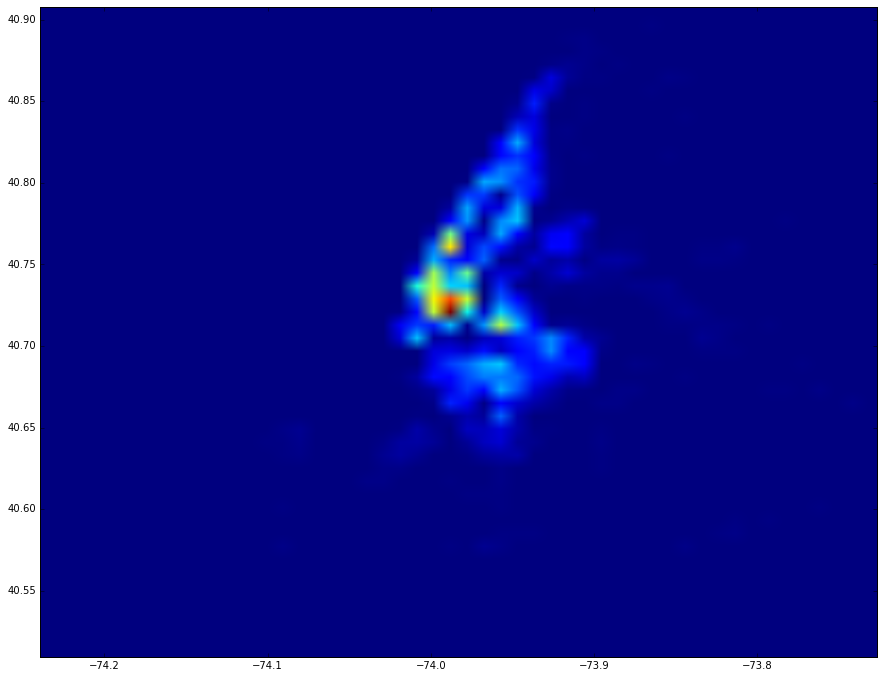

Heatmap of house offerings, red means higher density


In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

heatmap, xedges, yedges = np.histogram2d(dat_loc['longitude'], dat_loc['latitude'], bins=50)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()
print("Heatmap of house offerings, red means higher density")


In [64]:
max(prices),min(prices),np.median(prices),np.mean(prices)

(8000, 10, 130.0, 171.25689982476635)